In [2]:
using DelimitedFiles

In [84]:
a=["DSSY695_SIR+", "DSSY718_H4K16Q", "DSSY719_H3K79L", "DSSY724_sir2N345A", "DSSY739_sir3bah∆"]

5-element Vector{String}:
 "DSSY695_SIR+"
 "DSSY718_H4K16Q"
 "DSSY719_H3K79L"
 "DSSY724_sir2N345A"
 "DSSY739_sir3bah∆"

In [241]:
AUCbulk=zeros(5,2)
AUCE=zeros(5,2)
j=0
for char in a
    j=j+1
    k=0
    for char2 in ["1","2"]
        k=k+1
        fullbed=readdlm("HMR bedgraphs\\"*char*"_Rep"*char2*".bedgraph")
        chrIII=fullbed[fullbed[:,1].=="III",:]
        Esil=chrIII[chrIII[:,2].>286622 .&& chrIII[:,2].<287122,:]
        for i in 1:size(Esil)[1]
            if Esil[i,4]<1.0
                Esil[i,4]=0.0
            else
                Esil[i,4]=Esil[i,4]-1.0
            end
        end
        HMRbulk=chrIII[chrIII[:,2].>287122 .&& chrIII[:,2].<288941,:]
        for i in 1:size(HMRbulk)[1]
            if HMRbulk[i,4]<1.0
                HMRbulk[i,4]=0.0
            else
                HMRbulk[i,4]=HMRbulk[i,4]-1.0
            end
        end
        #Measure AUC.
        AUC=0.0 
        for i in 1:(size(HMRbulk)[1]-1)
        #Units bp*ChIP.A.U.
        AUC=AUC+0.5*(HMRbulk[i,4]+HMRbulk[i+1,4])
        end   
        AUCbulk[j,k]=AUC
        #Now the silencer
        AUC=0.0 
        for i in 1:(size(Esil)[1]-1)
        #Units bp*ChIP.A.U.
        AUC=AUC+0.5*(Esil[i,4]+Esil[i+1,4])
        end   
        AUCE[j,k]=AUC
    end
end
for k in 1:2   
    normbulk=AUCbulk[1,k]
    normE=AUCE[1,k]
    for i in 1:size(AUCbulk)[1]
        AUCbulk[i,k]=AUCbulk[i,k]/normbulk
        AUCE[i,k]=AUCE[i,k]/normE
    end
end

In [242]:
using Statistics
meanE=zeros(5)
meanbulk=zeros(5)
devE=zeros(5)
devbulk=zeros(5)
for i in 1:5
    meanE[i]=mean(AUCE[i,:])
    meanbulk[i]=mean(AUCbulk[i,:])
    devE[i]=std(AUCE[i,:])
    devbulk[i]=std(AUCbulk[i,:])
end

In [243]:
outputMutants=transpose([transpose(meanbulk);transpose(meanE);transpose(devbulk);transpose(devE)])
writedlm("bulk_vs_HMRE_xyerror.txt",outputMutants)

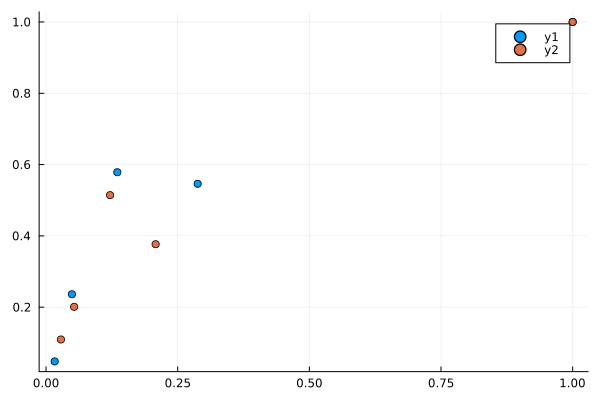

In [195]:
scatter(AUCbulk,AUCE)

In [232]:
b=["0", "50", "100", "200", "300", "400"]
AUCbulk=zeros(6,2)
AUCE=zeros(6,2)
j=0
for char in b
    j=j+1
    k=0
    for char2 in ["1","2"]
        k=k+1
        fullbed=readdlm("HMR bedgraphs\\Sir4V5_DSSY744_"*char*"nM_Rep"*char2*".bedgraph")
        chrIII=fullbed[fullbed[:,1].=="III",:]
        Esil=chrIII[chrIII[:,2].>286622 .&& chrIII[:,2].<287122,:]
        for i in 1:size(Esil)[1]
            if Esil[i,4]<1.0
                Esil[i,4]=0.0
            else
                Esil[i,4]=Esil[i,4]-1.0
            end
        end
        HMRbulk=chrIII[chrIII[:,2].>287122 .&& chrIII[:,2].<288941,:]
        for i in 1:size(HMRbulk)[1]
            if HMRbulk[i,4]<1.0
                HMRbulk[i,4]=0.0
            else
                HMRbulk[i,4]=HMRbulk[i,4]-1.0
            end
        end
        #Measure AUC.
        AUC=0.0 
        for i in 1:(size(HMRbulk)[1]-1)
        #Units bp*ChIP.A.U.
        AUC=AUC+0.5*(HMRbulk[i,4]+HMRbulk[i+1,4])
        end   
        AUCbulk[j,k]=AUC
        #Now the silencer
        AUC=0.0 
        for i in 1:(size(Esil)[1]-1)
        #Units bp*ChIP.A.U.
        AUC=AUC+0.5*(Esil[i,4]+Esil[i+1,4])
        end   
        AUCE[j,k]=AUC
    end
end
for k in 1:2   
    normbulk=AUCbulk[5,k]
    normE=AUCE[5,k]
    for i in 1:size(AUCbulk)[1]
        AUCbulk[i,k]=AUCbulk[i,k]/normbulk
        AUCE[i,k]=AUCE[i,k]/normE
    end
end

In [238]:
using Statistics
meanE=zeros(6)
meanbulk=zeros(6)
devE=zeros(6)
devbulk=zeros(6)
for i in 1:6
    meanE[i]=mean(AUCE[i,:])
    meanbulk[i]=mean(AUCbulk[i,:])
    devE[i]=std(AUCE[i,:])
    devbulk[i]=std(AUCbulk[i,:])
end

In [239]:
outputTitr=transpose([transpose(meanbulk);transpose(meanE);transpose(devbulk);transpose(devE)])
writedlm("bulk_vs_HMRE_titr_xyerror.txt",outputTitr)

In [240]:
outputTitr

6×4 transpose(::Matrix{Float64}) with eltype Float64:
 0.00701884  0.00858343  0.00187349  0.00205489
 0.0164992   0.01752     0.0115468   0.0189104
 0.17173     0.292548    0.0206197   0.0313847
 0.786852    0.873299    0.0308592   0.0453118
 1.0         1.0         0.0         0.0
 0.529663    0.46025     0.0453461   0.0282951

In [237]:
AUCbulk

6×2 Matrix{Float64}:
 0.0083436  0.00569408
 0.0246641  0.00833437
 0.18631    0.157149
 0.808673   0.765031
 1.0        1.0
 0.561728   0.497599